# Как изменяется когерентность альфа у HC и MDD групп

Берем длинные записи (8 мин) и смотрим динамику у 3-х здоровых субъектов и 3-х пациентов

Смотрим участок 5 минут, с 3 по 7 минуту

MDD
* Plekhanov rest 16-06
* Proskurin rest 14-04
* Rakova rest 03-12

HC
* Biglova rest 27-06
* Prutko rest 25-05
* Semenov rest 21-12

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../eeg-research/')

from os.path import join

import pipeline.features
import pipeline.models
from pipeline.explore import feat_performance

In [2]:
import numpy as np
import pandas as pd
import scipy.signal

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
preproc_data_path = '../../preproc_data/depr/epoch_3'
raw_data_path = '../../raw_data/depr_evm'
path_file = pd.read_csv(preproc_data_path + '/path_file.csv')

In [4]:
pd.set_option('display.max_rows', 100)

In [6]:
import mne

In [84]:
sample1 = mne.io.read_raw_egi(raw_data_path + '/norma 8min/Biglova rest 27-06.raw', preload=True, verbose=False)
sample2 = mne.io.read_raw_egi(raw_data_path + '/norma 8min/Prutko rest 25-05.raw', preload=True, verbose=False)
sample3 = mne.io.read_raw_egi(raw_data_path + '/norma 8min/Semenov rest 21-12.raw', preload=True, verbose=False)

In [85]:
sample4 = mne.io.read_raw_egi(raw_data_path + '/patients 8min/Plekhanov rest 16-06.raw', preload=True, verbose=False)
sample5 = mne.io.read_raw_egi(raw_data_path + '/patients 8min/Proskurin rest 14-04.raw', preload=True, verbose=False)
sample6 = mne.io.read_raw_egi(raw_data_path + '/patients 8min/Rakova rest 03-12.raw', preload=True, verbose=False)

In [86]:
electrode_mapping = {
    'E36': 'c3',
    'E104': 'c4',
    'E129': 'cz',
#     'Cz': 'cz',
    'E24': 'f3',
    'E124': 'f4',
    'E33': 'f7',
    'E122': 'f8',
    'E22': 'fp1',
    'E9': 'fp2',
#     'E14': 'fpz',
#     'E21': 'fpz',
#     'E15': 'fpz',
    'E11': 'fz',
    'E70': 'o1',
    'E83': 'o2',
    'E52': 'p3',
    'E92': 'p4',
    'E58': 't5',
    'E96': 't6',
    'E45': 't3',
    'E108': 't4',
    'E62': 'pz'
}

In [87]:
sample1.rename_channels(electrode_mapping)
sample2.rename_channels(electrode_mapping)
sample3.rename_channels(electrode_mapping)
sample4.rename_channels(electrode_mapping)
sample5.rename_channels(electrode_mapping)
sample6.rename_channels(electrode_mapping)

<RawEGI | Rakova rest 03-12.raw, 133 x 240000 (480.0 s), ~243.8 MB, data loaded>

In [88]:
sample1.pick_channels(['f3', 'f4', 't6', 'c3'])
sample2.pick_channels(['f3', 'f4', 't6', 'c3'])
sample3.pick_channels(['f3', 'f4', 't6', 'c3'])
sample4.pick_channels(['f3', 'f4', 't6', 'c3'])
sample5.pick_channels(['f3', 'f4', 't6', 'c3'])
sample6.pick_channels(['f3', 'f4', 't6', 'c3'])

<RawEGI | Rakova rest 03-12.raw, 4 x 240000 (480.0 s), ~7.3 MB, data loaded>

In [89]:
%matplotlib notebook

In [90]:
sample1.filter(l_freq=1, h_freq=30)
sample2.filter(l_freq=1, h_freq=30)
sample3.filter(l_freq=1, h_freq=30)
sample4.filter(l_freq=1, h_freq=30)
sample5.filter(l_freq=1, h_freq=30)
sample6.filter(l_freq=1, h_freq=30)

<RawEGI | Rakova rest 03-12.raw, 4 x 240000 (480.0 s), ~7.3 MB, data loaded>

In [91]:
def prepare_df(sample):
    df = sample.to_data_frame()
    df.set_index('time', inplace=True)

    df_new = df.iloc[::4][[]].copy()
    for col in df.columns:
        df_new[col] = scipy.signal.decimate(df[col], 4)
    df_new = df_new.iloc[120*125:]
    return df_new

In [92]:
df1 = prepare_df(sample1)
df2 = prepare_df(sample2)
df3 = prepare_df(sample3)
df4 = prepare_df(sample4)
df5 = prepare_df(sample5)
df6 = prepare_df(sample6)

In [93]:
def get_coh_alpha_windowed(df):
    get_coh_alpha = pipeline.features.get_func_by_method('coh-alpha')

    rows = []
    for window_idx in range(60*5 - 10):
        df_window = df.iloc[window_idx*125:(window_idx+10)*125]
        d = get_coh_alpha(df_window)
        d['window_idx'] = window_idx
        rows.append(d)
    res_win_10 = pd.DataFrame(rows)

    rows = []
    for window_idx in range(60*5 - 20):
        df_window = df.iloc[window_idx*125:(window_idx+20)*125]
        d = get_coh_alpha(df_window)
        d['window_idx'] = window_idx
        rows.append(d)
    res_win_20 = pd.DataFrame(rows)

    rows = []
    for window_idx in range(60*5 - 30):
        df_window = df.iloc[window_idx*125:(window_idx+30)*125]
        d = get_coh_alpha(df_window)
        d['window_idx'] = window_idx
        rows.append(d)
    res_win_30 = pd.DataFrame(rows)
    
    rows = []
    for window_idx in range(60*5 - 60):
        df_window = df.iloc[window_idx*125:(window_idx+60)*125]
        d = get_coh_alpha(df_window)
        d['window_idx'] = window_idx
        rows.append(d)
    res_win_60 = pd.DataFrame(rows)
    
    return res_win_10, res_win_20, res_win_30, res_win_60

## 3 HC subjects

In [117]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df1)

In [118]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

In [120]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df2)

<IPython.core.display.Javascript object>


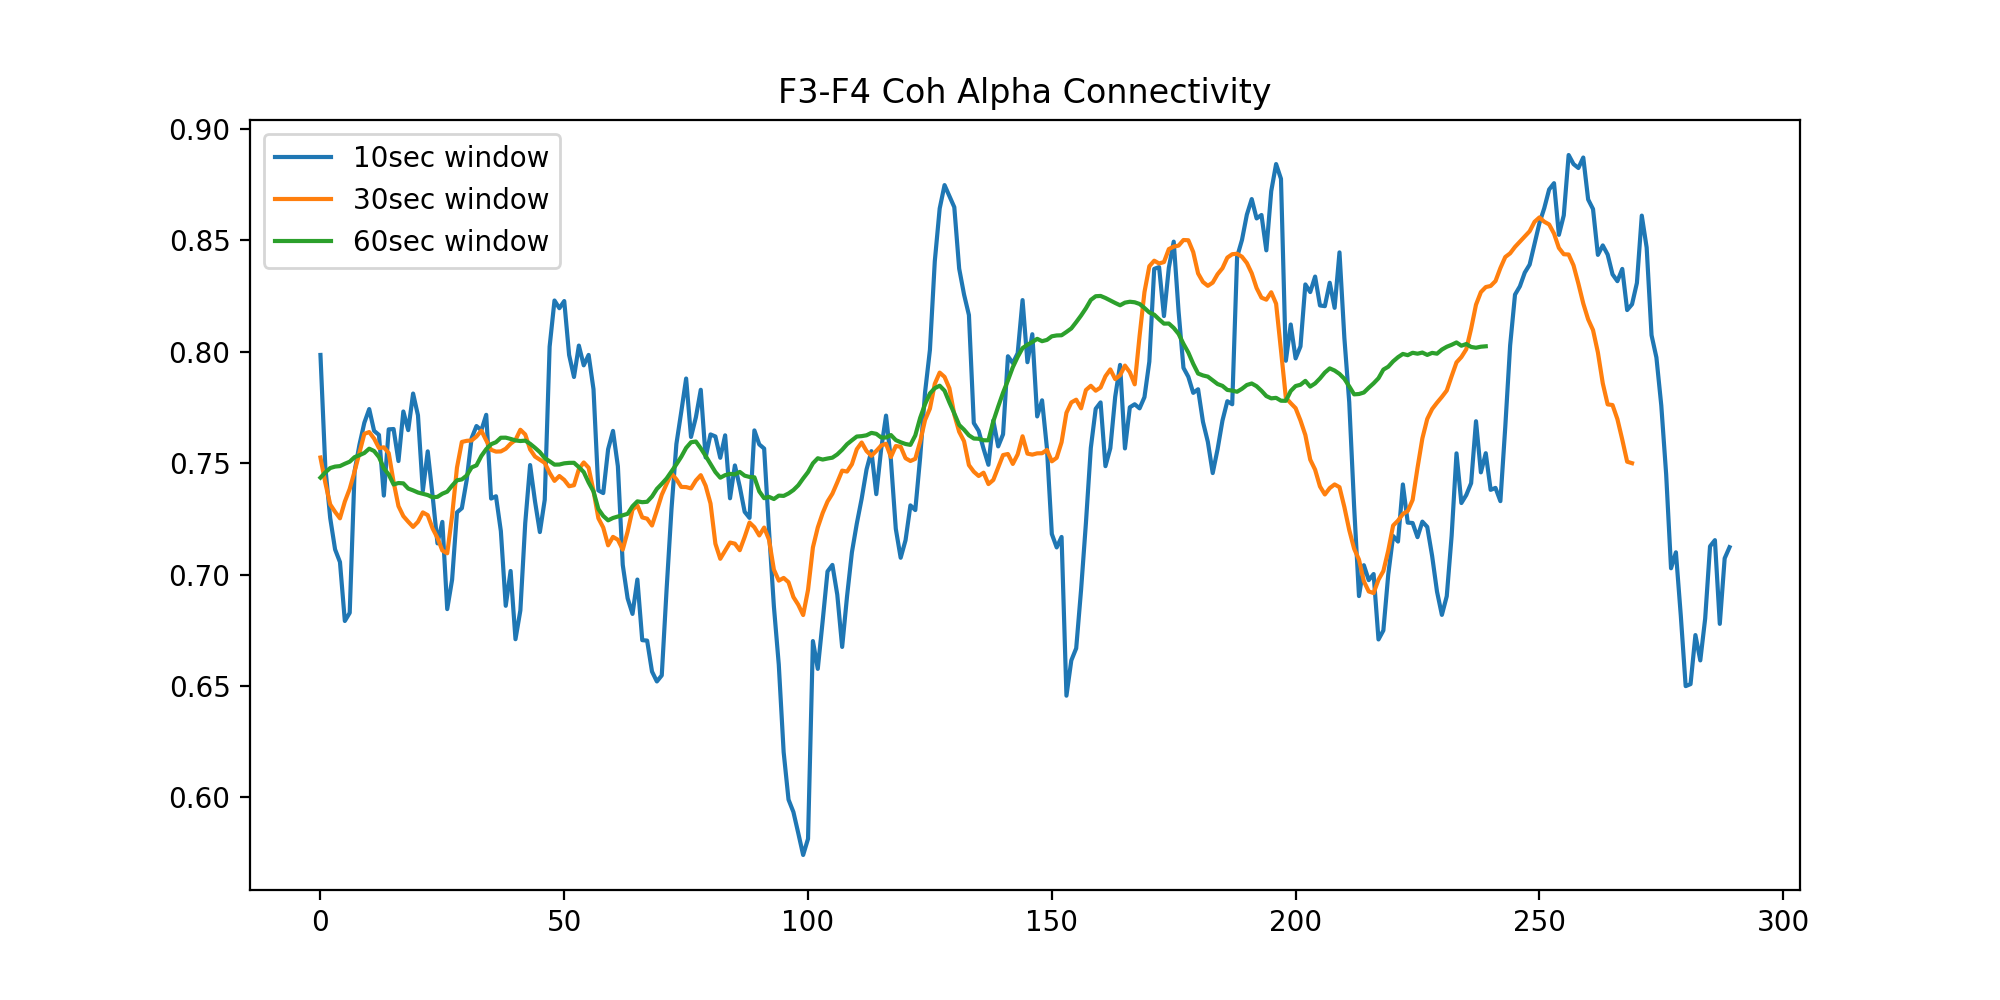

In [121]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

In [122]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

In [123]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df3)

In [124]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

In [125]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

## 3 MDD subjects

In [108]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df4)

In [109]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


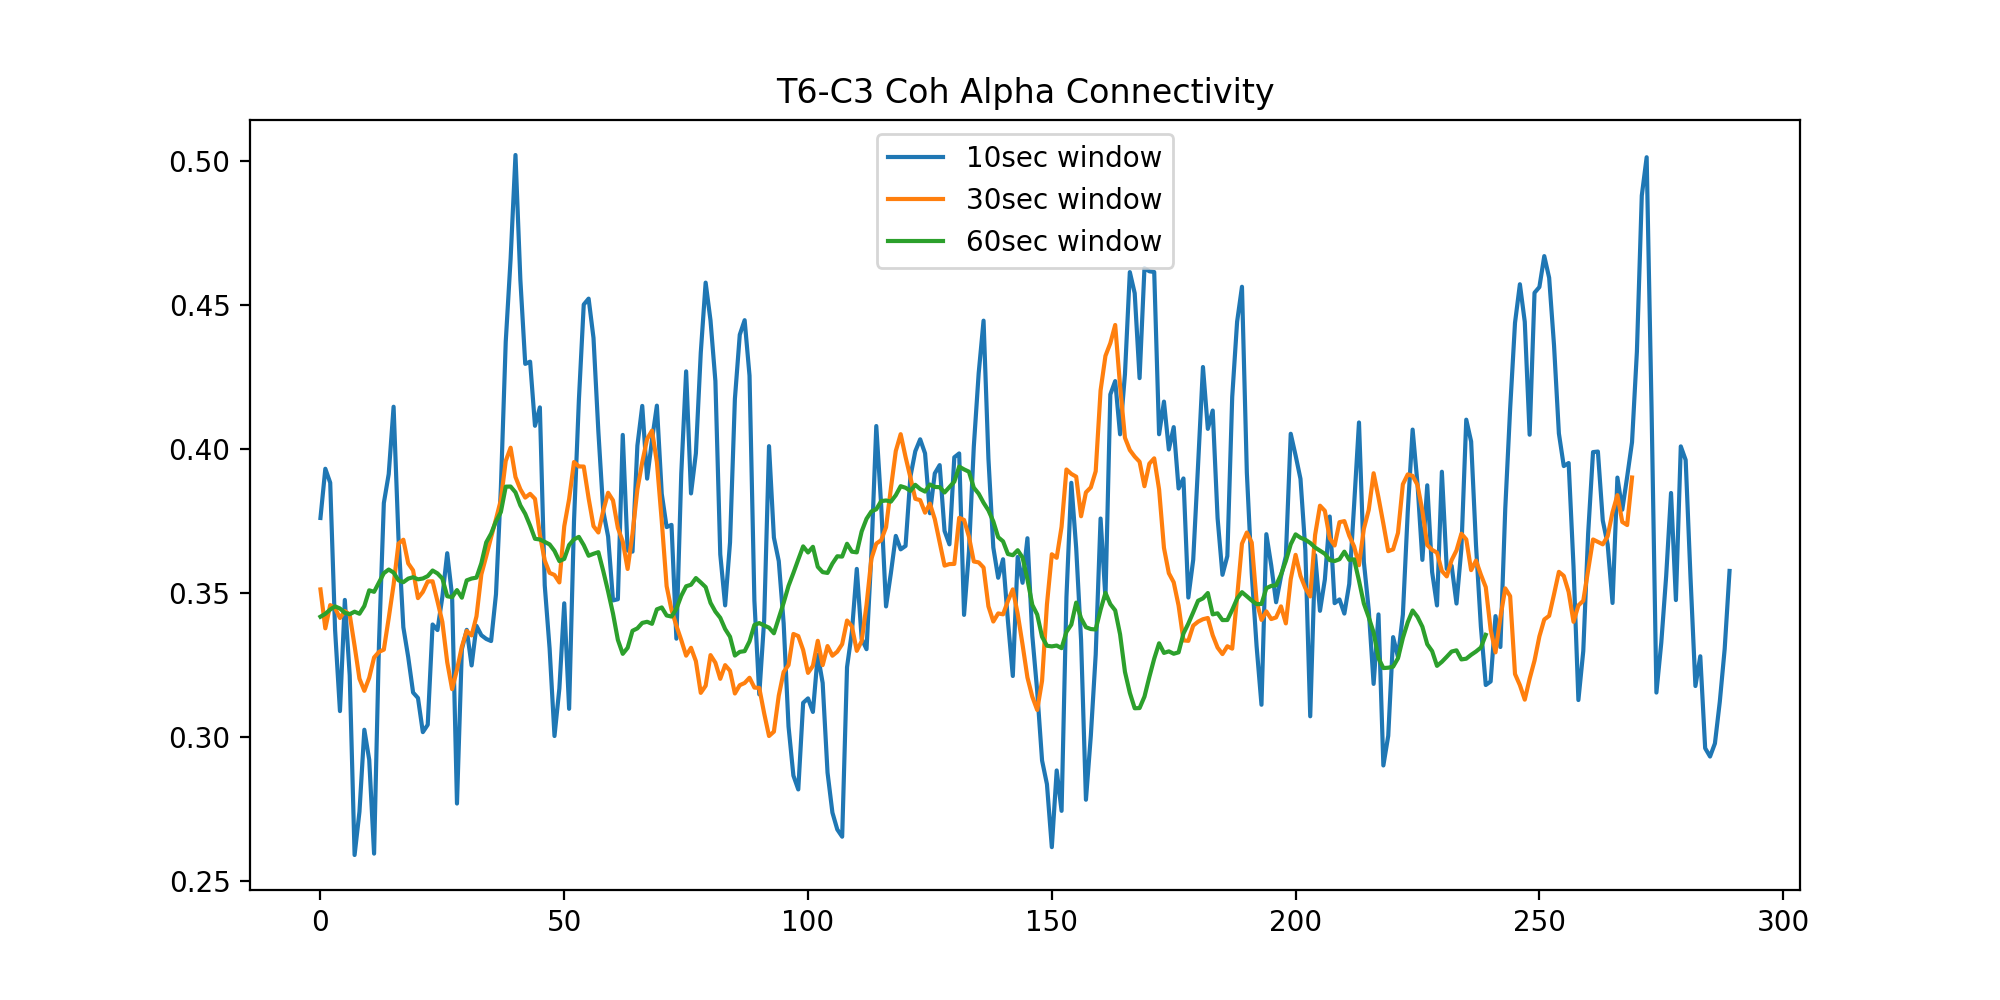

In [110]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()

In [111]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df5)

<IPython.core.display.Javascript object>


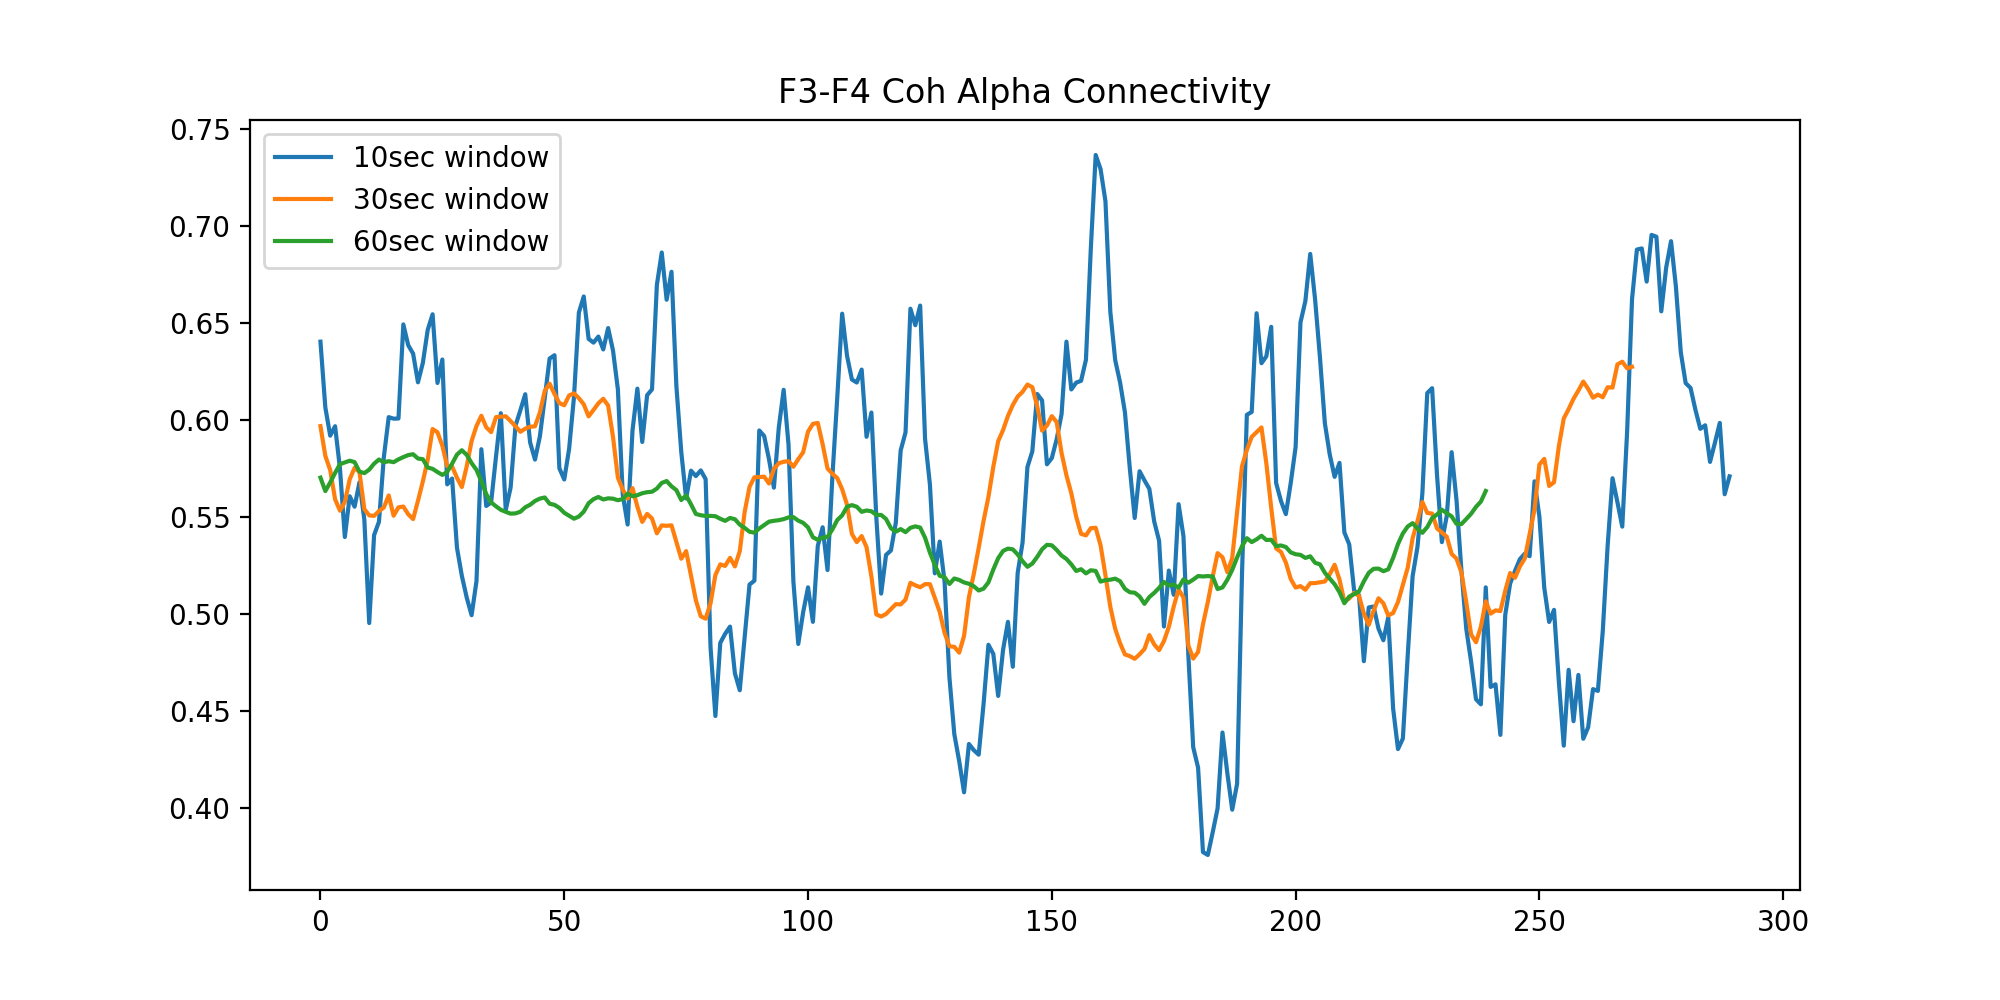

In [112]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

In [113]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

In [114]:
res_win_10, res_win_20, res_win_30, res_win_60 = get_coh_alpha_windowed(df6)

In [115]:
plt.figure(figsize=[10, 5])
plt.title('F3-F4 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_f3_f4'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_f3_f4'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_f3_f4'], label='60sec window')
plt.legend()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


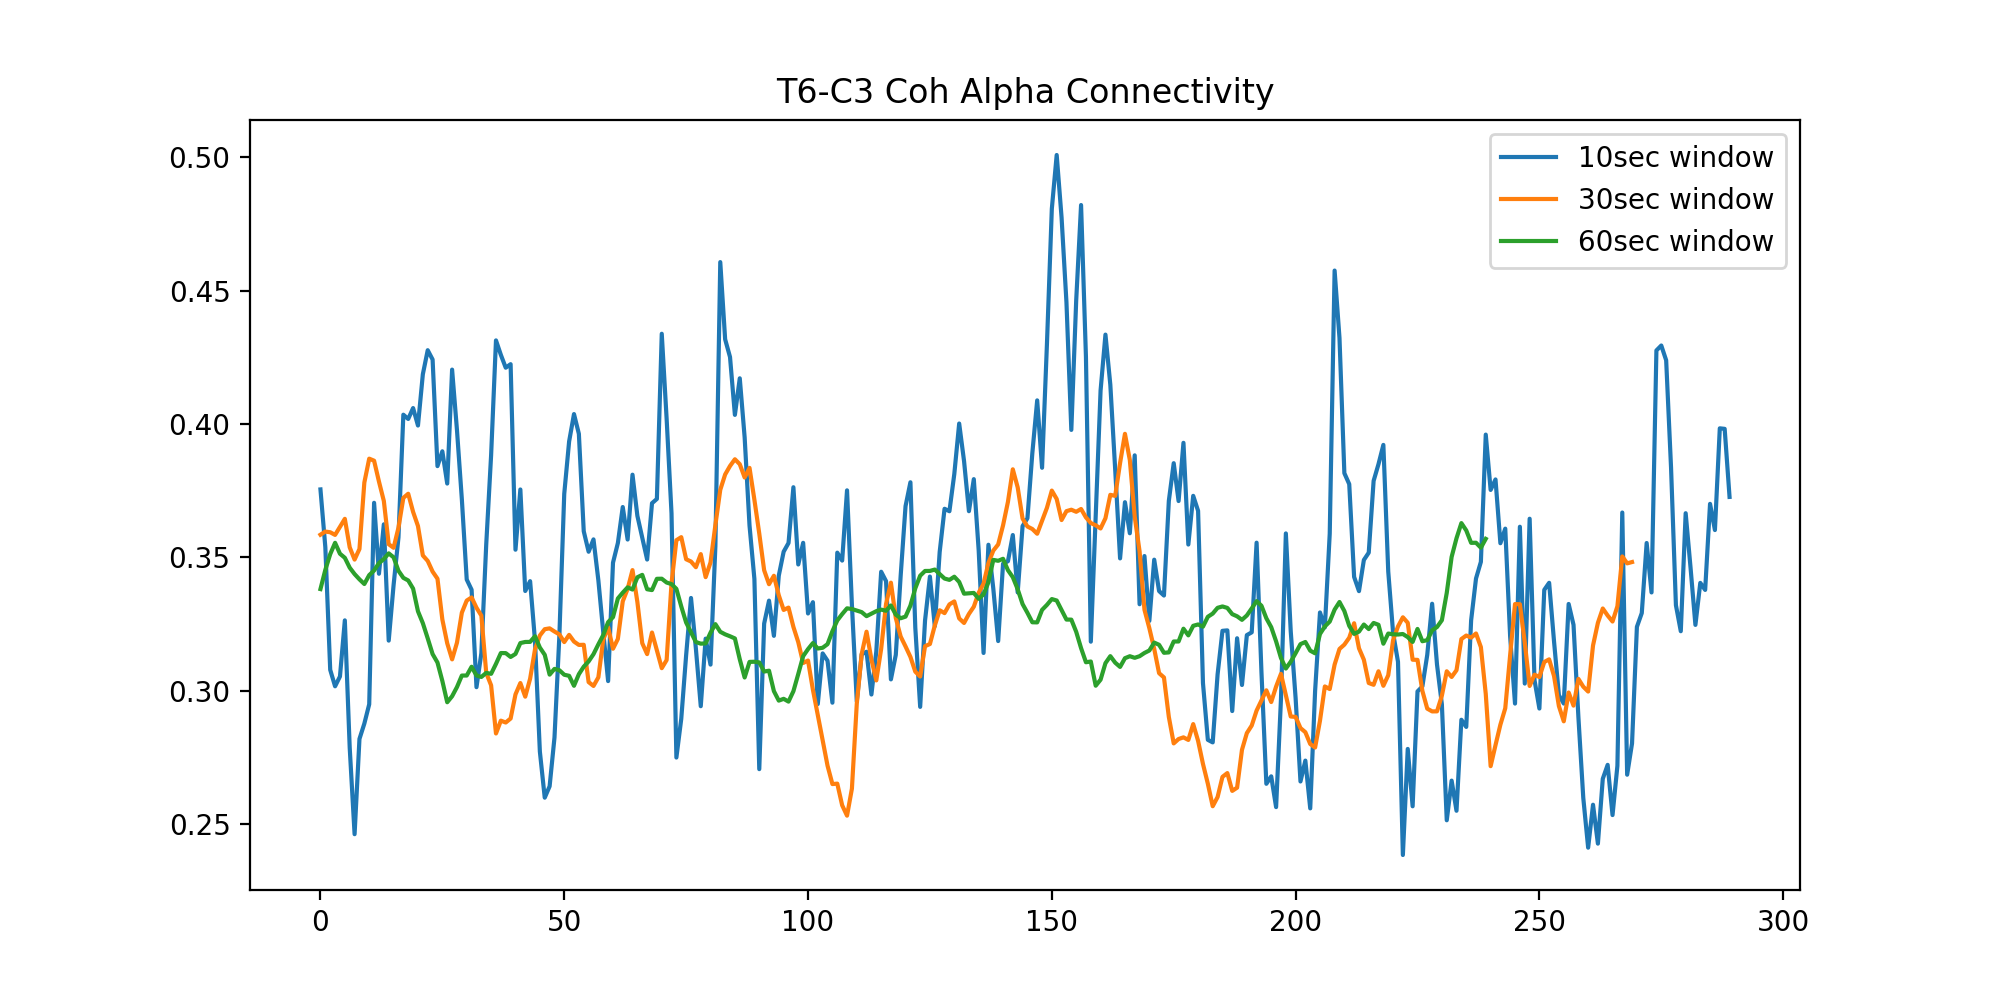

In [116]:
plt.figure(figsize=[10, 5])
plt.title('T6-C3 Coh Alpha Connectivity')
plt.plot(res_win_10['window_idx'], res_win_10['coh_alpha_c3_t6'], label='10sec window')
plt.plot(res_win_30['window_idx'], res_win_30['coh_alpha_c3_t6'], label='30sec window')
plt.plot(res_win_60['window_idx'], res_win_60['coh_alpha_c3_t6'], label='60sec window')
plt.legend()